Claudio Sartori 

Elaboration from the example given in [Sebastian Raschka](http://sebastianraschka.com), 2015

https://github.com/rasbt/python-machine-learning-book

# Machine Learning - Lab
## Working with Unlabeled Data – Clustering Analysis
### Use __DBSCAN__

### Overview
In this example we will use an _artificial_ data set  
1. load the data  
2. check the shape and plot the content  
3. observe the plot and decide which are the most interesting columns, to use in the plots of the clusters  
    - make a 2d plot of the two most promising columns  
    - use the 2d projection only for plotting, not for the other computations
4. Clustering with default hyperparameters
    1. initialize and `fit_predict` an estimator for `DBSCAN`, using the default parameters, then print the results
        - the labels are the unique values of the predicted values  
    1. print if there is noise  
        - if there is noise the first cluster label will be `-1`  
    1. print the number of clusters (noise excluded)  
        - the other clusters are labeled starting from `0`
    1. for each cluster (noise excluded) compute the __centroid__  
        - plot the data with the centroids and the colors representing clusters  
        - use the `plot_clusters` function provided  
5. find the best parameters using `ParameterGrid`
    1. prepare a dictionary with the parameters lists  
        - generate the list of the parameter combinations with `ParameterGrid`
    1. for each combination of parameters  
        1. initialize the DBSCAN estimator  
        1. `fit_predict`  
        1. extract the labels and the number of clusters excluding the _noise_  
        1. compute the silhouette score and the number of unclustered objects (noise)  
        1. filter and print the parameters and the results  
            - print if the silhouette score is above a threshold and the percentage of unclustered is below a threshold  
6. observe visually the most promising combination of parameters  
    1. fit and predict the estimator  
    1. plot the clusters  
    1. compute the silouette scores for the individual samples using the function `silhouette_samples`
    1. plot the silhouette scores for each sample using the function `plot_silhouette`  
        

In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

rnd_state = 42 # This variable will be used in all the procedure calls allowing a random_state parameter
               # in this way the running can be perfectly reproduced
               # just change this value for a different experiment

# the .py files with the functions provided must be in the same directory of the .ipynb file
from plot_clusters import plot_clusters      # python script provided separately
from plot_silhouette2 import plot_silhouette  # python script provided separately

### 1. Load the data

 `data_file = 'ex1_4d_moon.csv'` </br> 
 `delimiter = ','`</br>

`# to fill`

In [2]:
data_file = 'ex1_4d_moon.csv'
delimiter = ','
X = np.loadtxt(data_file, delimiter = delimiter)

### 2. check the shape and plot the content

`# to fill`

In [3]:
X.shape

(1500, 4)

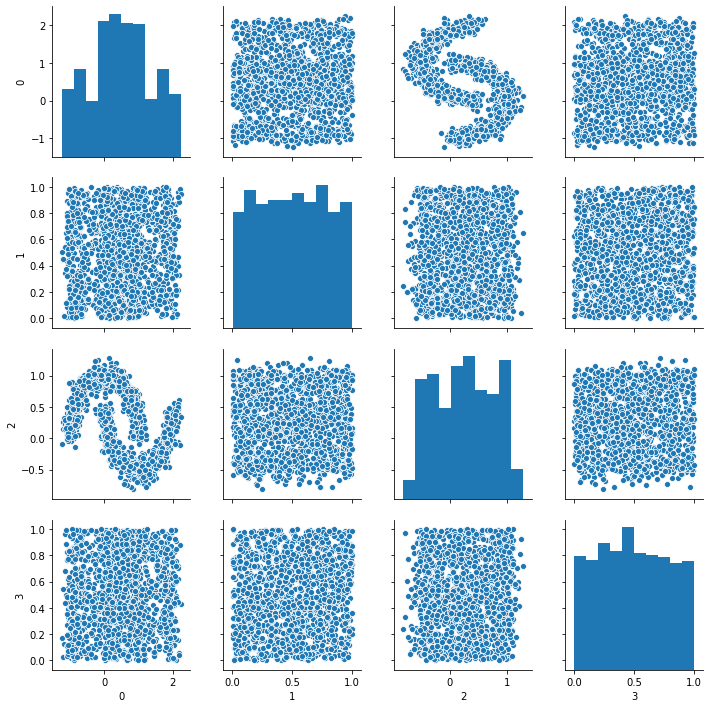

In [4]:
sns.pairplot(pd.DataFrame(X))

### 3. observe the plot and decide which are the most interesting columns, to use in the plots of the clusters
In this simple example you can easily see which are the two most interesting columns.

All the plots will focus on those columns

`# to fill`

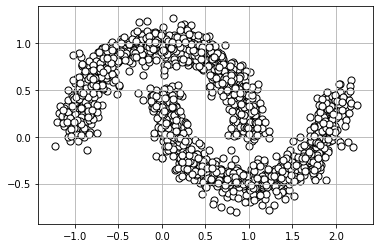

In [5]:
# focus = [0,1]
focus = [0,2]
plt.scatter(X[:,focus[0]], X[:,focus[1]]
            , c='white'          # color filling the data markers
            , edgecolors='black' # edge color for data markers
            , marker='o'         # data marker shape, e.g. triangles (v<>^), square (s), star (*), ...
            , s=50)              # data marker size
plt.grid()  # plots a grid on the data
plt.show()

### 4. Clustering with default parameters

4.A initialize and fit_predict an estimator for DBSCAN, using the default parameters, then print the results

`# to fill`

In [6]:
db = DBSCAN()
y_db = db.fit_predict(X)

In [7]:
print(db)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)


4.B print if there is noise, if there is noise the first cluster label will be -1

`# to fill`

In [8]:
cluster_labels_all = np.unique(y_db)
cluster_labels = cluster_labels_all[cluster_labels_all != -1]
n_clusters = len(cluster_labels)
if cluster_labels_all[0] == -1:
    noise = True
    print("There is noise")
else:
    noise = False
    print("There is no noise")

There is no noise


4.C	print the number of clusters (noise excluded)

`# to fill`

In [9]:
print("There is/are {} cluster(s)".format(n_clusters-noise))

There is/are 1 cluster(s)


4.D for each cluster (noise excluded) compute the centroid; plot the data with the centroids and the colors representing clusters; use the plot_clusters function provided 


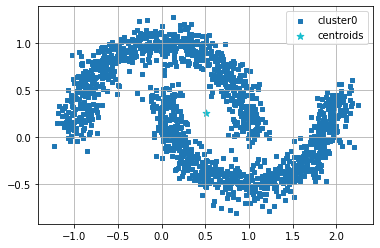

In [10]:
cluster_centers = np.empty((n_clusters,X.shape[1]))
for i in cluster_labels:
    cluster_centers[i,:] = np.mean(X[y_db==i,:], axis = 0)
plot_clusters(X,y_db,dim=(focus[0],focus[1]), points = cluster_centers)

### 5. Find the best parameters using `ParameterGrid`

Prepare a dictionary with the parameters lists and
generate the list of the parameter combinations with the function `ParameterGrid`.

Steps: 

1. prepare a variable with the dictionary, one key for each parameter (in our case `eps` and `min_samples`, the values are the respective ranges
1. call the function ParameterGrid passing to it the dictionary
1. transform the result into the list `params`

`eps` can range from 0.05 to 1, step 0.05 - 
`min_samples` can range from 1 to 10, step 1

`#to fill`

In [11]:
param_grid = {'eps': list(np.arange(0.05, 1, 0.05)), 'min_samples': list(range(1,10,1))}
params = list(ParameterGrid(param_grid))

The number of parameter combination can be very high, but it is very likely that a high number of combinations give non--interesting results. For instance, if a result has a very low silhouette index or a very high number of unclustered objects, it is very likely that it is not interesting. For this reason I suggest to set three thresholds, `sil_thr` and `clu_thr`, (e.g. set to 0 and .66 respectively), and the maximum number of clusters `clu_max` to 10.

`# to fill`

In [12]:
sil_thr = 0  # visualize results only for combinations with silhouette above the threshold
clu_thr = .66 # visualize results only for combinations with unclustered% below the threshold
clu_max = 10

Initialize the results as an empty list

5.A for each combination of parameters 
- initialize the DBSCAN estimator, the combination of parameters must be passed with the `**kwargs` method (variable length list of keyword-value pairs), as follows
    - `db = DBSCAN(**(params[i])`
- fit_predict X and store in y_db
- extract the unique labels from y_db
- extract the cluster labels, exluding the label -1 of noise, if present
- extract the non-noise objects and their assigned labels
- if there is one cluster, compute the silhouette score
- compute the fraction of clustered objects
- append to `results` a list with `eps`, `min_samples`, `n_clusters`, `silhouette`, `clustered`

Transform the results into a dataframe with appropriate column numbers, and show the filtered rows, according to the thresholds above mentioned.

In [13]:
results = []
for i in range(len(params)):
    db = DBSCAN(**(params[i]))
    y_db = db.fit_predict(X)
    cluster_labels_all = np.unique(y_db)
    cluster_labels = cluster_labels_all[cluster_labels_all != -1]
    n_clusters = len(cluster_labels)
    # select the clustered objects
    X_cl = X[y_db!=-1,:]
    y_db_cl = y_db[y_db!=-1]
    # if there is more than one cluster, compute the silhouette score 
    # only for the clustered objects
    if n_clusters > 1:
        silhouette = silhouette_score(X_cl,y_db_cl)
    clustered = y_db_cl.shape[0]/y_db.shape[0] # fraction of clustered objects
    results.append([db.eps, db.min_samples, n_clusters, silhouette, clustered])    
#         if silhouette > sil_thr and clustered > clu_thr:
#             print("{:11.2f}\t{:11}\t{:11}\t{:11.2f}\t{:11.2f}"\
#                   .format(db.eps, db.min_samples, n_clusters, silhouette, clustered))

In [14]:
results = pd.DataFrame(results, 
                       columns = ['eps',
                                  'min_samples',
                                  'n_clusters',
                                  'silhouette', 
                                  'clustered'
                                 ])
int_results = results[(results.n_clusters<10) & 
                          (results.n_clusters >1) & 
                          (results.silhouette > sil_thr) &
                          (results.clustered > clu_thr)
                        ]
int_results

,eps,min_samples,n_clusters,silhouette,clustered
37,0.25,2,2,0.142653,0.987333
42,0.25,7,2,0.277544,0.967333
43,0.25,8,2,0.282699,0.942000
44,0.25,9,2,0.288060,0.915333


### 6. Observe  
- Observe visually the most promising combination of parameters.  
- Plot the clusters with the centers  
- Plot the silhouette indexs for all the clustered samples  

In [15]:
# db = DBSCAN(eps=0.9, min_samples=4)
db = DBSCAN(eps=0.25, min_samples=9)
y_db = db.fit_predict(X)
cluster_labels_all = np.unique(y_db)
cluster_labels = cluster_labels_all[cluster_labels_all != -1]
n_clusters = len(cluster_labels)

In [16]:
cluster_centers = np.empty((n_clusters,X.shape[1]))
for i in cluster_labels:
    cluster_centers[i,:] = np.mean(X[y_db==i,:], axis = 0)

In [17]:
print("There are {} clusters".format(n_clusters))

There are 2 clusters


In [18]:
print("The cluster labels are {}".format(cluster_labels))

The cluster labels are [0 1]


In [19]:
cluster_centers

array([[ 1.01020828,  0.5258109 , -0.15197393,  0.49321332],
       [ 0.01924021,  0.48326285,  0.66582183,  0.4831518 ]])

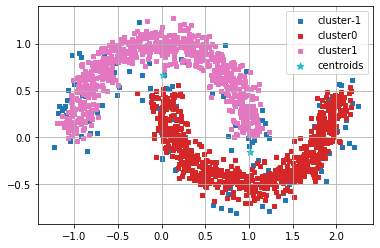

In [20]:
plot_clusters(X,y_db,dim=(focus[0],focus[1]), points = cluster_centers)

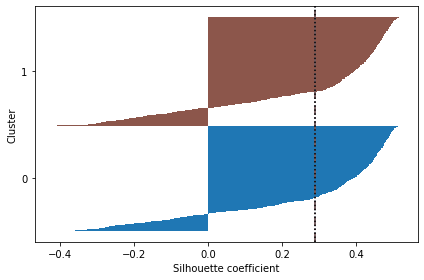

In [21]:
X_cl = X[y_db!=-1,:]
y_db_cl = y_db[y_db!=-1]
silhouette = silhouette_samples(X_cl,y_db_cl)
plot_silhouette(silhouette,y_db_cl)
# silhouette = silhouette_samples(X,y_db)
# plot_silhouette(silhouette,y_db)